For this problem-set we will be using the notebook `19. Analizando Datos Económicos`. Read the notebook `19. Analizando Datos Económicos` and asks questions on the QA about everything you do not understand. 

Do not go further than the `Lets INNER JOIN our state_api dataframes` title, as we will be covering it later (you can look it anyway :D)

**Notes** Try importing all the libraries of the notebook. If you have problems importing libraries, write on a jupyter chunk the following code and run it: 

`!pip install requests`

`!pip install sqlalchemy`

`!pip install seaborn`

**1.** Using the pandas dataframe `states`, create a new column `check_total` that represent the sum of each row and check if it's the same as the column `total`. What percentage of Hispanics identify as `Other`? Hint: Try yo figure out what `.sum()` does.

In [2]:
import requests
import sqlalchemy
import seaborn
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
states = pd.read_csv('../data/19. Analizando Datos Económicos/states.csv', index_col=0)
states['check_total'] = states.sum(axis = 1) 
others = round(100 * states['hispanic_other'].sum() / states['hispanic'].sum())
print("El",others,"% de hispanos se identifica como otros")
states.head()

El 35 % de hispanos se identifica como otros


,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial,check_total
Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806,14339208
Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507,2130693
Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669,19176051
Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173,8747754
California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688,111761868


**2.** Show the 3 top states with the largest value in column `hispanic_asian` using the pandas dataframe `states_hr`.

In [4]:
hispanic_races = [s for s in states.columns if 'hispanic_' in s]
states_hr = states[hispanic_races].copy()
states_hr.nlargest(3, 'hispanic_asian')

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
California,6497681,135268,200551,85937,15809,6231785,846688
Texas,6304207,92773,90386,16170,3736,2594206,359443
New York,1436727,289943,52998,14050,3446,1359943,259815


**3.** Create a copy pandas dataframe called `state_api_class` from `states_api1`. 
    
- Rename the columns from the pandas dataframe `state_api_class` with the list `["nombre", "mediana_edad", "tamaño_familiar_promedio", "estado"]`. 
- Create the column `nombre_lower` which takes to lowercase the column `nombre`.
- Keep only rows where `nomber_lower` starts with `n`.

In [20]:
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"
r = requests.get(base_url, params=predicates)
col_names = ["name", "median_age", "avg_family_size", "state"]
states_api1 = pd.DataFrame(columns = col_names, data = r.json()[1:])
states_api_class = states_api1.copy()

In [19]:
states_api_class.rename(columns={"name": 'nombre','median_age': 'mediana_edad','avg_family_size': 'tamaño_familiar_promedio','state': 'estado'},inplace = "True")
states_api_class['nombre_lower'] = states_api_class['nombre'].str.lower()
startsN = states_api_class['nombre_lower'].str.contains("^n")
states_api_class[startsN]

,nombre,mediana_edad,tamaño_familiar_promedio,estado,nombre_lower
27,Nebraska,36.2,3.04,31,nebraska
28,Nevada,36.3,3.20,32,nevada
29,New Hampshire,41.1,2.96,33,new hampshire
30,New Jersey,39.0,3.22,34,new jersey
31,New Mexico,36.7,3.13,35,new mexico
32,New York,38.0,3.20,36,new york
33,North Carolina,37.4,3.01,37,north carolina
34,North Dakota,37.0,2.91,38,north dakota


**4.** Create a new pandas dataframe called `states_above_median` from `states_api1` that contains only rows where `median_age` is above the mean of the sample plus 1 standard deviation. Then, get the mean value of `avg_family_size`.

In [95]:
states_above_medianToFloat = pd.DataFrame(states_api1["median_age"].astype('float'))
states_above_median = (states_above_medianToFloat.mean() + states_above_medianToFloat.std()) > states_above_medianToFloat
states_above_medianToFloat[states_above_median]
avg_familiy_size = pd.DataFrame(states_api1["avg_family_size"].astype('float'))
avg_familiy_size.mean()

avg_family_size    3.077692
dtype: float64

**5.** Using `.scatter` from matplotlib, check from the pandas dataframe `states_api2` if there is any relationship between the columns `in_adult_pct` and `in_juvenile_pct`. **HINT:** Be creative :)

Try things like:
- Adding a measure of size with the parameter `s`
- Adding color with the parameter `c`
- Putting it a title and name the axis
- Adding some text inside the chart!
- ... 

Save it and share it on the `forum` section of teams!

In [137]:
def api_census_request(year, dataset, vars_list):
    # Build base URL
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])
    
    # Specify Census variables and other predicates
    get_vars = vars_list

    predicates = {}
    predicates["get"] = ",".join(get_vars)
    predicates["for"] = "state:*"
    r = requests.get(base_url, params=predicates)
    return r
def request_to_df(r, col_names):
    col_names = ["name", "in_adult", "in_juvenile", "state"]
    states_api2 = pd.DataFrame(columns=col_names, data=r.json()[1:])
    return states_api2
get_vars = ["NAME", "PCT021005", "PCT021015"]
r = api_census_request(year, dataset, get_vars)
col_names = ["name", "in_adult", "in_juvenile", "state"]
states_api2 = request_to_df(r, col_names)
states_api2[["in_adult", "in_juvenile"]] = states_api2[["in_adult", "in_juvenile"]].astype(int)
states_api2["pct_in_adult"] = 100 * states_api2["in_adult"] / (states_api2["in_adult"] + states_api2["in_juvenile"])
states_api2["pct_in_juvenile"] = 100 * states_api2["in_juvenile"] / (states_api2["in_juvenile"] + states_api2["in_adult"])
states_api2.head()

,name,in_adult,in_juvenile,state,pct_in_adult,pct_in_juvenile
0,Alabama,131,536,01,19.640180,80.359820
1,Alaska,83,92,02,47.428571,52.571429
2,Arizona,681,629,04,51.984733,48.015267
3,Arkansas,89,541,05,14.126984,85.873016
4,California,321,6489,06,4.713656,95.286344


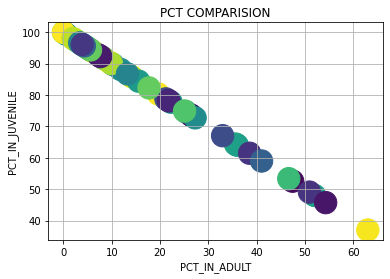

In [160]:
colors = np.random.rand(52)
x = states_api2.pct_in_adult
y = states_api2.pct_in_juvenile

plt.scatter(x,y,s=500,c=colors)

plt.xlabel('PCT_IN_ADULT')
plt.ylabel('PCT_IN_JUVENILE')
plt.title('PCT COMPARISION')
plt.grid(True)

plt.show()